# Семинар 1. Предобработка текстовых данных

<img src="data/imgs/photo-1472737817652-4120ab61af6c.jpeg">

Компьютеры не понимают человеческие языки, поэтому текстовые данные нужно каким-то образом преобразовывать. Это часто не простой и не тривиальный процесс. На этом занятии мы разберем основные способы очистки данных, нормализации и векторизации. Также мы посмотрим на готовые интрументы, предназначенные для работы с русским языком. В конце занятия мы попробуем порешать задачу автоматического определения тональности твитов.

## Очистка данных

Часто в данных, с которыми нам нужно работать помимо текста присутствует ещё какая-то лишняя информация: тэги, ссылки, код, разметка. От всего этого нужно избавляться.

In [1]:
# сразу импортируем все нужные библиотеки
# подробнее о каждой из них я расскажу по ходу
import string
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem
from string import punctuation
import re
mystem = Mystem()
morph = MorphAnalyzer()

<font color=red>Ошибки:</font>
Если возникает ошибка **ImportError**, значит у вас не установлен какой-то пакет.
выполните в консоли *"pip install package_name"* (или pip3, если у вас две разные версии питона).
Также это можно сделать и внутри ноутбука, просто поставьте **!** перед командой

In [ ]:
!pip3 install nltk pymystem3 pymorphy2

Если ругается **nltk**, нужно запустить *nltk.download()* и скачать нужные модели или данные.

In [ ]:
import nltk
nltk.download()

Возьмем в качестве примера несколько статей с Хабрахабра. Они были скачаны автоматически и в них остались некоторые тэги.

In [2]:
# загрузим статьи в список
habr_texts = [open('data/habr/habr_{}.txt'.format(i)).read() for i in range(5)]

In [71]:
# посмотрим на статью
print(habr_texts[1][:1200])

Сегодняшняя заметка будет о сервисе отслеживания активности пользователя — <a href="http://www.crazyegg.com" title="Сумасшедшие яйца">CrazyEgg</a>. Я не знаю кому обязан сервис таким говорящим именем, но оно работает, и хорошо. Запоминается? Отлично!<br><br><img src="http://img172.imageshack.us/img172/8434/18274658kc4.png" alt="Сумасшедшее яйцо"><br><br><blockquote><h3>Что это такое?</h3><br>
Как уже сказано выше это сервис для отслеживания перемещения пользователей по сайту — кто куда кликнул, какие ссылки наиболее популярные и тому подобная, разнородная информация для юзабилистов.<br>
Сервис позволяет отслеживать активность определенных пользователей, и выводить эти данные в различных формах: «инфракрасная» — где чем активнее область, тем она «теплее», салюты (чем активнее область, тем больше конфети), простой список с сортировкой по активности, колбы (чем заполненнее колба, тем активнее область), облака (на мой взгляд наиболее удобный вариант — совмещает в себе все остальные вместе 

В html все тэги заключаются в угловые скобки. Мы можем использовать это, чтобы легко избавиться от всех тэгов сразу. Напишем простую регулярку, которая будет удалять всё, что попадает между символами **<** и **>** и не является **>**.

In [4]:
# re - модуль регулярных выражений в питоне
# функция sub заменяет все, что подходит под шаблон, на указанный текст
def remove_tags_1(text):
    return re.sub(r'<[^>]+>', '', text)

Проверим как работает наша функция.

In [70]:
print(remove_tags_1(habr_texts[1])[:1200])

Сегодняшняя заметка будет о сервисе отслеживания активности пользователя — CrazyEgg. Я не знаю кому обязан сервис таким говорящим именем, но оно работает, и хорошо. Запоминается? Отлично!Что это такое?
Как уже сказано выше это сервис для отслеживания перемещения пользователей по сайту — кто куда кликнул, какие ссылки наиболее популярные и тому подобная, разнородная информация для юзабилистов.
Сервис позволяет отслеживать активность определенных пользователей, и выводить эти данные в различных формах: «инфракрасная» — где чем активнее область, тем она «теплее», салюты (чем активнее область, тем больше конфети), простой список с сортировкой по активности, колбы (чем заполненнее колба, тем активнее область), облака (на мой взгляд наиболее удобный вариант — совмещает в себе все остальные вместе взятые).Для кого это?
Разумеется сервис изначально планировался как первый помощник для юзабилистов, но пользоваться им может каждый, у кого есть деньги — интуитивный интерфейс, и хороший дизайн дае

Можно заметить, что в некоторых местах удаление тэгов приводит к тому, что между точкой и началом следующего 
предложения нет пробела, а это может помешать правильно токенизировать текст,
поэтому сделаем так, чтобы тэг заменялся пробелом.

In [6]:
def remove_tags_2(text):
    return re.sub(r'<[^>]+>', ' ', text)

In [69]:
print(remove_tags_2(habr_texts[0])[:1200])

Как всегда я плетусь в самом конце WP-движения, это я о скорости реакции на анонсы релизов) 
Уже успели выложить и две разные версии русского вордпресса 2.3.2, который только-только сошёл с конвейера ( от Максима   и от  mywordpress.ru ), но, тем не менее, я всё же рискну быть не оригинальным и отписать ещё раз изменения со своими комментариями. 
И так, данные взяты из  официального анонса .     
Улучшена производительность, при обработке постов, перед выводом пользователю.   Надеюсь, я правильно понял, то, что написано в  этом тикете .   При выводе поста, да и любой другой страницы, производится множественный вызов функции  get_post , через которую работают такие функции как  the_title ,  get_permalink  и т.д. Причём, хоть данные полученные от  get_posts  и кэшируются, но фильтрация/отбор данных происходит после получения уже ВСЕХ данных, а не ДО, что естественно сказывается на производительности. В 2.3.2 это пофиксили.  
Улучшена работа функции  is_admin() . Теперь нет возможности по

Теперь куски текста не слипаются, но появились последовательности из нескольких пробелов, чтобы убрать их, добавим ещё одно регулярное выражение и применим его к тексту, из которого уже удалили тэги.

In [8]:
def remove_tags_3(text):
    no_tags_text = re.sub(r'<[^>]+>', ' ', text)
    no_space_sequences_text = re.sub('  +', ' ', no_tags_text)
    return no_space_sequences_text

In [68]:
print(remove_tags_3(habr_texts[3])[:1200])

Отличнейшая статья Джоэла Спольски об отличиях отрисовки текста на компьютерах под управлением Mac OS X и Windows, а также о неприятии пользователями Windows того, как Safari рендерит тексты на экране. Написана простым языком, доступно и без нагружающих деталей. Оригинал Алгортм 
У Apple и Microsoft всегда были разногласия по поводу того, как показывать шрифты на компьютерном экране. Сегодня обе компании используют “субпиксельную” отрисовку, чтобы добиться более четко выглядящих шрифтов на экранах с традиционно невысоким разрешением. Где они отличаются, так это в философии. 
Apple считает, что цель алгоритма — сохранить дизайн шрифта насколько это возможно, даже за счет небольшой размытости. 
Microsoft считает, что форма каждой буквы должна быть в пределах границы, установленных пикселями, чтобы предотвратить размывание и улучшить читаемость, даже за счет неполного соответствия начертанию. 
Теперь, когда вышла Safari для Windows, которой пришлось сильно постараться, чтобы использовать 

Теперь текст более менее чистый.

## Токенизация

Из текста теперь нужно выделить интересующие нас объекты. Чаще всего нужно просто слова.

Самый простой способ поделить текст на слова — стандартный питоновский ***str.split*** метод.
    По умолчанию он разбивает текст по последовательностям пробелов
 (т.е. даже со второй версией remove_tags всё бы хорошо разделилось).

Попробуем на какой-нибудь очищенной статье.

In [10]:
clean_habr_texts = [remove_tags_2(text) for text in habr_texts]

In [65]:
clean_habr_texts[1].split()[:10]

['Сегодняшняя',
 'заметка',
 'будет',
 'о',
 'сервисе',
 'отслеживания',
 'активности',
 'пользователя',
 '—',
 'CrazyEgg']

Большая часть слов отделяется, но знаки препинания лепятся к словам.
Можно пройтись по всем словам и убрать из них пунктцацию с методом str.translate.

In [12]:
#основные знаки преминания хранятся в питоноском модуле string.punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
# сделаем словарь, который будет всем знакам препинания сопостовлять None
# и преобразуем текст
table = str.maketrans({ch: None for ch in string.punctuation})
[word.translate(table) for word in clean_habr_texts[3].split()][:10]

['Отличнейшая',
 'статья',
 'Джоэла',
 'Спольски',
 'об',
 'отличиях',
 'отрисовки',
 'текста',
 'на',
 'компьютерах']

Все разобралось очень хорошо, остались слова в кавычках-елочках и лапках, длинное тире, но наверное это и к лучшему.
Не к лучшему то, что многоточие не удаляется.
Ещё можно отметить то, что такой способ будет, например, удалять апострофы.

In [14]:
"father's".translate(table)

'fathers'

Исправить и то и другое можно добавив или удалив какие-то знаки пунктуации к/из ***string.punctuation***.

In [15]:
punct_extended = string.punctuation + '«»—…“”'
table = str.maketrans({ch: None for ch in punct_extended})
[word.translate(table) for word in clean_habr_texts[3].split()][:10]

['Отличнейшая',
 'статья',
 'Джоэла',
 'Спольски',
 'об',
 'отличиях',
 'отрисовки',
 'текста',
 'на',
 'компьютерах']

In [16]:
punct_no_apostrophie = re.sub("'", '', string.punctuation)
table = str.maketrans({ch: None for ch in punct_no_apostrophie})
print("father's".translate(table))

father's


Ещё есть готовые токенизаторы из nltk. Они не удаляют пунктуацию, а выделяют её отдельным токеном

Например ***wordpunct_tokenizer*** разбирает по регулярке - '**\w+|[^\w\s]+**'

In [64]:
wordpunct_tokenize(clean_habr_texts[1])[:10]

['Сегодняшняя',
 'заметка',
 'будет',
 'о',
 'сервисе',
 'отслеживания',
 'активности',
 'пользователя',
 '—',
 'CrazyEgg']

Ещё есть ***word_tokenize***. Он также построен на регулярках, но они там более сложные (учитывается последовательность некоторых 
символов, символы начала, конца слова и т.д). 

Специально подобранного под русский язык токенизатора там нет, 
но и с английским всё работает достаточно хорошо:
сокращения типа **т.к** собираются в один токен, дефисные слова тоже не разделяются. Многоточия тут тоже не отделяются, но это можно поправить.

In [63]:
word_tokenize(clean_habr_texts[3])[:10]

['Отличнейшая',
 'статья',
 'Джоэла',
 'Спольски',
 'об',
 'отличиях',
 'отрисовки',
 'текста',
 'на',
 'компьютерах']

# Нормализация

Часто после выделения слов (или других вещей) нужно привести разные формы одного слова к одной стандартной или получить подробную информацию об отдельном слове.

Эта задача уже в разы сложнее предыдущих. Простой функцией тут не отделаешься. К счастью, есть готовые инструменты.

Для русского основых варианта два: Mystem и Pymorphy.

Майстем работает немного лучше и сам токенизирует,
поэтому можно в него засовывать сырой текст.

In [19]:
# mystem.lemmatize функция лемматизации в майстеме
# сам объект mystem нужно заранее инициализировать
# мы сделали это в начале тетрадки строчкой "mystem = Mystem()"
mystem.lemmatize(clean_habr_texts[1])[:10]

['сегодняшний', ' ', 'заметка', ' ', 'быть', ' ', 'о', ' ', 'сервис', ' ']

In [20]:
# Если нужна грамматическая информация или надо сохранить ненормализованный текст,
# есть функция mystem.analyze
words_analized = mystem.analyze(clean_habr_texts[1])

In [21]:
# возвращает она список словарей
# каждый словарь имеет либо одно поле 'text' (когда попался пробел) или text и analysis
# в analysis снова список словарей с вариантами разбора (первый самый вероятный)
# поля в analysis - 'gr' - грамматическая информация, 'lex' - лемма
# analysis - может быть пустым списком
words_analized[:10]

[{'analysis': [{'gr': 'A=им,ед,полн,жен', 'lex': 'сегодняшний'}],
  'text': 'Сегодняшняя'},
 {'text': ' '},
 {'analysis': [{'gr': 'S,жен,неод=им,ед', 'lex': 'заметка'}],
  'text': 'заметка'},
 {'text': ' '},
 {'analysis': [{'gr': 'V,нп=непрош,ед,изъяв,3-л', 'lex': 'быть'}],
  'text': 'будет'},
 {'text': ' '},
 {'analysis': [{'gr': 'PR=', 'lex': 'о'}], 'text': 'о'},
 {'text': ' '},
 {'analysis': [{'gr': 'S,муж,неод=пр,ед', 'lex': 'сервис'}],
  'text': 'сервисе'},
 {'text': ' '}]

In [22]:
print('Слово - ', words_analized[0]['text'])
print('Разбор слова - ', words_analized[0]['analysis'][0])
print('Лемма слова - ', words_analized[0]['analysis'][0]['lex'])
print('Грамматическая информация слова - ', words_analized[0]['analysis'][0]['gr'])

Слово -  Сегодняшняя
Разбор слова -  {'lex': 'сегодняшний', 'gr': 'A=им,ед,полн,жен'}
Лемма слова -  сегодняшний
Грамматическая информация слова -  A=им,ед,полн,жен


In [23]:
#леммы можно достать в одну строчку
[parse['analysis'][0]['lex'] for parse in words_analized if parse.get('analysis')][:10]

['сегодняшний',
 'заметка',
 'быть',
 'о',
 'сервис',
 'отслеживание',
 'активность',
 'пользователь',
 'я',
 'не']

Недостатки Mystem: это продукт Яндекса с некоторыми ограничениями на использование, больше он не развивается.

Pymorphy - открытый и развивается (можно поучаствовать на гитхабе)

Ссылка на репозиторий: https://github.com/kmike/pymorphy2

У него нет втстроенной токенизации и он расценивает всё как слово (это одновременно плюс и минус).

In [24]:
# основная функция - pymorphy.parse
words_analized = [morph.parse(token) for token in word_tokenize(clean_habr_texts[2])]

In [25]:
# Она похожа на analyze в майстеме только возрващает список объектов Parse
# Первый в списке - самый вероятный разбор (у каждого есть score)
# Информация достается через атрибут (Parse.word - например)
# Грамматическая информация хранится в объекте OpencorporaTag и из него удобно доставать
# части речи или другие категории
print('Cлово - ', words_analized[0][0].word)
print('Разбор слова - ', words_analized[0][0])
print('Лемма слова - ', words_analized[0][0].normal_form)
print('Грамматическая информация слова - ', words_analized[0][0].tag)
print('Часть речи слова - ', words_analized[0][0].tag.POS)
print('Род слова - ', words_analized[0][0].tag.gender)
print('Число  слова - ', words_analized[0][0].tag.number)
print('Падеж слова - ', words_analized[0][0].tag.case)

Cлово -  сегодняшняя
Разбор слова -  Parse(word='сегодняшняя', tag=OpencorporaTag('ADJF femn,sing,nomn'), normal_form='сегодняшний', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'сегодняшняя', 382, 7),))
Лемма слова -  сегодняшний
Грамматическая информация слова -  ADJF femn,sing,nomn
Часть речи слова -  ADJF
Род слова -  femn
Число  слова -  sing
Падеж слова -  nomn


## Дополнительная очистка текста

Пунктуация часто совсем не нужна и поэтому можно выбросить её заранее. Если нужно обрабатывать много текста, это может немного ускорить процесс.


In [26]:
# Оставим только буквено-численные токены
# Это не самый лучший вариант, так как удалятся сокращения с точкой, слова через дефис
text = 'В этом случае слова вроде т.к. и по-другому не пройдут фильтр и будут удалены.'
good_tokens = [word for word in word_tokenize(text) if word.isalnum()]
[morph.parse(token)[0].normal_form for token in good_tokens]

['в',
 'это',
 'случай',
 'слово',
 'вроде',
 'и',
 'не',
 'пройти',
 'фильтр',
 'и',
 'быть',
 'удалить']

In [27]:
#можно сделать фильтр по длине, или оставить всё, что не целиком состоит из знаков препинания
good_tokens = [word for word in word_tokenize(text) if len(word) > 1 
                                                    and not all([ch in punct_extended for ch in word])]
[morph.parse(token)[0].normal_form for token in good_tokens]

['это',
 'случай',
 'слово',
 'вроде',
 'т.к',
 'по-другому',
 'не',
 'пройти',
 'фильтр',
 'быть',
 'удалить']

Если не хочется делать нормализацию, то можно хотя бы просто привести все слова к одному регистру.

In [28]:
print('СпАсИбО'.lower())
print('СпАсИбО'.upper())
print('СпАсИбО'.capitalize())

спасибо
СПАСИБО
Спасибо


После нормализации можно убрать стоп-слова (предлоги, союзы, местоимения, частотные слова).

In [29]:
# стоп-слова есть в nltk
stops = stopwords.words('russian')
print(stops)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

Список не идеальный и его можно расширять под свои задачи (в примере можно бы ещё удалить слово "это" и "вроде")

In [30]:
words_normalized = [morph.parse(token)[0].normal_form for token in good_tokens]
words_normalized_no_stops = [word for word in words_normalized if word not in stops]
print(words_normalized_no_stops)

['это', 'случай', 'слово', 'вроде', 'т.к', 'по-другому', 'пройти', 'фильтр', 'удалить']


# Классификация

Попробуем теперь применить эти знания на настоящей задаче. Возьмем данные Dialog Evaluation по анализу тональности твитов пользователей в адрес телекоммуникационных компаний. В изначальной формулировке нужно определять тональность относительно упомянутой компании, но мы упростим её до простого определения тональности твита.

Таким образом нам нужно по тексту твита приписать ему класс - негативный, нейтральный или положительный.

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline  
pd.set_option('max_colwidth', 1000)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [32]:
# я заранее подготовил для вас данные
train_data = pd.read_csv('data/sentiment_twitter/train_sentiment_ttk.tsv', sep='\t')
test_data = pd.read_csv('data/sentiment_twitter/test_sentiment_ttk.tsv', sep='\t')

Посмотрим на данные, чтобы убедиться, что всё нормально

In [33]:
train_data.head()

,label,text
0,0,"@mkomov Максим, Вашем письмо мы получили. Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки. #билайн"
1,0,«Мегафон» стал владельцем 50% акций «Евросети»
2,-1,"RT @fuckkiev: “@EvaKobb: МТС Россия прислала жителям Херсонщины сообщения, в которых обозвала украинцев фашистами? http://t.co/RbSesXlOUZ” …"
3,1,ВИДЕО: http://t.co/PSMLAhR4fI Реклама со смехом МТС - Супер 0
4,-1,"@parfenov1960 потому что МТС достало, а пчел ненавижу с детства, как и их мёд!"


In [34]:
test_data.head()

,label,text
0,-1,RT vzglyad: По делу о работе МТС в Узбекистане США предложили заморозить 300 млн
1,0,RT @kevinuyatukox: http://t.co/ljtrjq91v3 #Кредитные карты мегафон банка
2,0,#Оформить кредитную карту в банке мтс http://t.co/vv1B6PMWgH
3,0,#Как перевести деньги с билайна на кредитную карту
4,0,#Начальник отдела кредитного контроля оао мтс усачева н а


Проверим распределение классов (-1 - негативный отзыв, 1 - положительный, 0 - отрицательный)

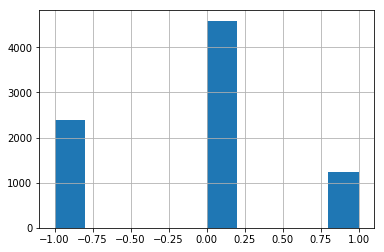

In [35]:
train_data.label.hist()

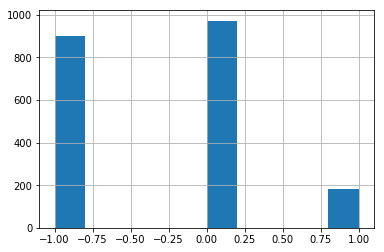

In [36]:
test_data.label.hist()

Видно, что положительный заметно меньше. 

Посмотрим на какой-нибудь негативный твит.

In [37]:
train_data['text'][10]

'@parfenov1960 Фуфло эт ваш Мегафон.просит много,дает мало.'

И на положительный

In [38]:
train_data['text'][9]

'«МегаФон» поможет контролировать расходы на Интернет за границей'

## Бейзлайн

В начале стоит попробовать самый простой возможный вариант. 
Count_vectorizer - без какой-либо нормализации подойдет.

Почти у всего в sklearn индентичный интерфейс. 
1. Нужно инициализировать нужный объект

    ***`vectorizer = CountVectorizer()`***

2. "Обучить" модель на наших данных.
    
    ***`vectorizer.fit(texts)`***
    
3. Преобразовать с помощью обученной модели наши данные в вектора.
    
    ***`X = vectorizer.transform(texts)`***

In [ ]:
# посмотрим какие опции есть у count_vectorizer
?CountVectorizer

In [39]:
# у count_vectorizer есть встроенный токенизатор, поэтому можно подавать текст напрямую
# обучим векторайзер на обучающей выборке и преобразуем тексты в векторы
count_vectorizer = CountVectorizer()
count_vectorizer.fit(train_data.text.values) 

X_train = count_vectorizer.transform(train_data.text.values)
X_test = count_vectorizer.transform(test_data.text.values)

In [40]:
# посмотрим на размеры матрицы
# первое число - количество твитов
# второе - размер каждого вектора (равен размеру словаря)
X_train.shape

(8208, 20511)

In [41]:
# нужно чтобы второе число совпадало в обучающей и тестовой выборке
X_test.shape

(2054, 20511)

In [42]:
# выделим классы в отдельные переменные
y_train = train_data.label.values
y_test = test_data.label.values

В качесте классификатора будем использовать Логистическую регрессию.

Интерфейс почти в точности такой же. 
1. Нужно инициализировать нужный объект

    ***`clf = LogisticRegression()`***

2. Обучить модель на наших заранее преобразованных данных.
    
    ***`clf.fit(X)`***
    
3. Предсказать классы на новых данных.
    
    ***`preds = clf.predict(texts)`***

In [43]:
#также можно для начала посмотреть параметры
#основной параметр это С, коэффициент регуляризации.
#Регуляризация нужна для того, чтобы ограничить значения выучиваемых параметров, чтобы избежать переобучения
# l2 стоит по умолчанию и обычно лучше работает, но
# l1 зануляет ненужные признаки и увеличивает значения важных
# поэтому её можно использовать для отбора признаков
#попробуйте перебрать значения (0.01, 0.1, 1(по умолчанию), 10, 100)
?LogisticRegression

Init signature: LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
both dense and sparse input. Use C-ordered arrays or CSR matrices
containing 64-bit floats for optimal performance; any other input format
will be converted (and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support on

In [44]:
clf = LogisticRegression(penalty="l1", C=0.1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
# предскажем значения тестовых твитов
y_pred = clf.predict(X_test)

In [46]:
# замерим качество классификации
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

             precision    recall  f1-score   support

         -1       0.69      0.59      0.64       902
          0       0.61      0.80      0.69       972
          1       0.30      0.03      0.06       180

avg / total       0.62      0.64      0.61      2054

Макросредняя F1 мера -  0.46306421211286786
Микросредняя F1 мера -  0.6387536514118792


У некоторых классификаторов можно посмотреть значимость признаков. У логрега они хранится в ***clf.coef_*** . Это массив размером (количество классов, количество признаков). 

Признаки можно достать из векторайзера с помощью метода ***get_feature_names***.

Вместе их можно соотнести встроеной функцией *zip*. При использовании **L1** регуляризации значений признака можно интерпретировать как важность.

In [47]:
def print_important(vectorizer, clf, topn=10):
    features = vectorizer.get_feature_names()
    classes = clf.classes_
    importances = clf.coef_
    for i, cls in enumerate(classes):
        print('Значимые слова для класса - ', cls)
        important_words = sorted(list(zip(features, importances[i])), key=lambda x: abs(x[1]), reverse=True)[:topn]
        print([word for word,_ in important_words])

In [48]:
print_important(count_vectorizer, clf)

Значимые слова для класса -  -1
['сбой', 'tele2', 'старые', 'нет', 'проблемы', 'тарифов', 'сука', 'просит', 'отключили', 'крыму']
Значимые слова для класса -  0
['пожалуйста', 'гонконгские', 'связь', 'просит', 'цены', '20', 'иа', 'здравствуйте', 'скачать', 'для']
Значимые слова для класса -  1
['узбекистан', 'спасибо', 'клиенты', 'люблю', 'запустил', 'области', 'пожалуйста', '4g', 'увеличил', 'теперь']


Для визуализации важных слов можно ещё использовать библиотеку **wordcloud**.

In [ ]:
#!pip install wordcloud

In [49]:
from wordcloud import WordCloud

(-0.5, 999.5, 499.5, -0.5)

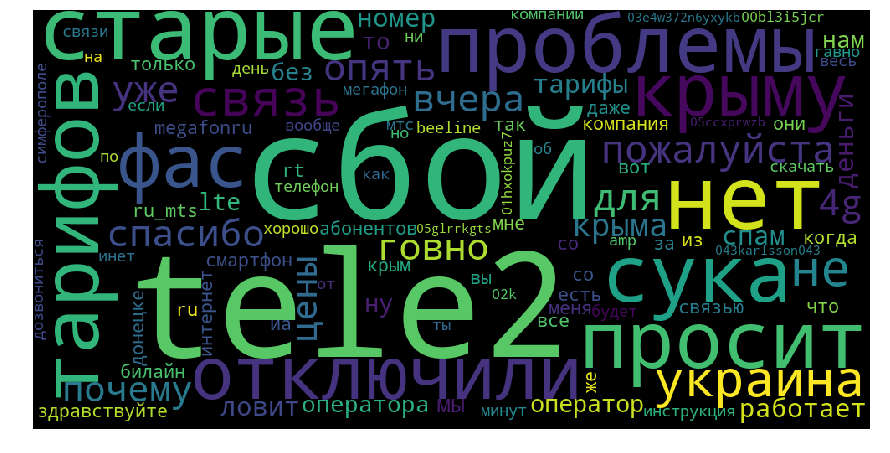

In [50]:
top = 150
features = count_vectorizer.get_feature_names()
importances = clf.coef_
classes = clf.classes_
words_with_weights = sorted(list(zip(features, importances[0])),key=lambda x: abs(x[1]), reverse=True)
only_words = [word for word,_ in words_with_weights][:top]

cloud = WordCloud(width=1000, height=500).generate(' '.join(only_words))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')

### Попробуем теперь TfidfVectorizer.

In [ ]:
# интерфейс точно такой же, но немного отличаются параметры
# токенизация по умолчанию также включена, поэтому подаём текст как есть
?TfidfVectorizer

In [51]:
tfidf = TfidfVectorizer()
tfidf.fit(train_data.text.values)
X_train = tfidf.transform(train_data.text.values)
X_test = tfidf.transform(test_data.text.values)

In [52]:
X_train.shape

(8208, 20511)

In [53]:
clf = LogisticRegression(penalty='l1')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
y_pred = clf.predict(X_test)

In [55]:
# замерим качество классификации
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

             precision    recall  f1-score   support

         -1       0.70      0.69      0.70       902
          0       0.66      0.76      0.71       972
          1       0.37      0.09      0.15       180

avg / total       0.65      0.67      0.65      2054

Макросредняя F1 мера -  0.5179519140882505
Микросредняя F1 мера -  0.6718597857838364


Также бывает полезно посмотреть на confision matrix.

Для красоты визуализируем с помощью библиотеки seaborn.

In [ ]:
#!pip install seaborn

In [56]:
import seaborn as sns

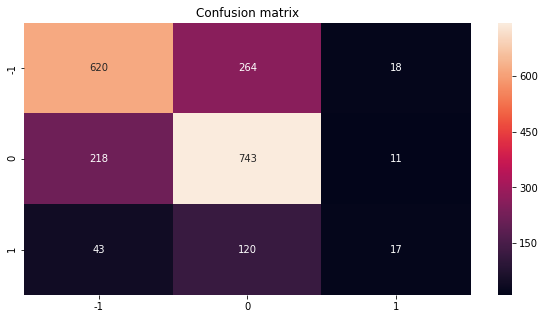

In [57]:
labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

In [ ]:
# если не устанавливается, посмотрите просто так
confusion_matrix(y_test, y_pred)

In [58]:
print_important(tfidf, clf, 20)

Значимые слова для класса -  -1
['сбой', 'tele2', 'старые', 'не', 'сука', 'говно', 'просит', 'проблемы', 'крыму', 'фас', 'нет', 'лежит', 'опять', 'http', 'спасибо', 'тарифов', 'украина', 'для', 'донецке', 'цены']
Значимые слова для класса -  0
['иа', 'просит', 'сбой', 'гонконгские', 'цены', 'границы', 'пожалуйста', 'сн', 'связь', 'ловит', 'здравствуйте', 'инструкция', 'люблю', 'для', 'ион', 'обратилась', 'долларов', 'даже', 'номер', 'меры']
Значимые слова для класса -  1
['люблю', 'узбекистан', 'спасибо', 'расходы', 'пожалуйста', 'подарок', 'клиенты', 'бесплатный', 'увеличил', 'защиты', 'не', 'мировое', 'заработал', 'запустил', 'области', 'beeline_rus', 'хорошего', 'реклама', 'водителей', 'номер']


## Улучшение качества классификации

#### По самым характерным словам видно, что в корпусе есть мусор, стоп слова, разные формы одного слова. Чтобы улучшить результат попробуйте почистить данные и добавить нормализацию.

In [61]:
def normalize(text):
    """
    функция нормализации
    
    ::парметры::
    @text - ненормализованный текст (string)
    
    ::returns::
    нормализованный текст (string)
    """
    
    # tokens = wordpunct_tokenize(text.lower())

    words_analyzed = mystem.analyze(text.lower())
    lemmas_raw = [parse["analysis"][0]["lex"] for parse in words_analyzed 
                  if parse.get("analysis")]
    lemmas = [lemma for lemma in lemmas_raw if lemmas not in stopwords.words("russian")]
    
    return " ".join(lemmas)

Чтобы применить нормализацию ко всему корпусу, воспользуйтесь функцией apply.

In [62]:
train_data['normalized'] = train_data['text'].apply(normalize)
test_data['normalized'] = test_data['text'].apply(normalize)

NameError: free variable 'lemmas' referenced before assignment in enclosing scope

Обучите новую модель на нормализованных данных.

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(train_data['normalized'].values)

X_train = tfidf.transform(train_data['normalized'].values)
X_test = tfidf.transform(test_data['normalized'].values)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))